# Aperture photometry



천체 관측 중 CCD(charge couple device) 관측 자료를 이용하여 구경 측광을 수행하는 방법을 다룹니다.

## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "GSHS_Photometry" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir GSHS_Photometry

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [1]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "GSHS_Photometry"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
GSHS_Photometry is already exist...


### FITS 파일 다운로드

나의 구글 드라이브에 저장된 CCD 관측 파일을 다운받아 보겠습니다.

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어입니다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리합니다.

MS Windows에서는 별도로 설치를 해줘야 하며,
구글 코랩도 wget을을 지원해주니 아래 셀을 실행하면 자신의 [작업 영역]에 저장된다. 하지만 이 파일은 이 런타임이 재실행 될때는 삭제됨에 유의하시기 바랍니다.

아래 코드를 실행하면 여러분의 작업영역에 해당 파일을 저장해 줄 것입니다.



In [2]:
fname = "TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit"
fid = "19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP"

# wget을 이용(나의 구글드라이브에서 공유한 파일을 구글 코랩에서 사용할 경우)
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid}" -O {save_dir_name}/{fname}


--2024-12-21 19:09:38--  https://docs.google.com/uc?export=download&id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP
Resolving docs.google.com (docs.google.com)... 172.217.161.206, 2404:6800:400a:813::200e
Connecting to docs.google.com (docs.google.com)|172.217.161.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP&export=download [following]
--2024-12-21 19:09:38--  https://drive.usercontent.google.com/download?id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.76.129, 2404:6800:400a:813::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.76.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33958080 (32M) [application/octet-stream]
Saving to: ‘GSHS_Photometry/TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit’



### 데이터 확인

* 코랩을 사용할 경우에는 오른쪽의 [파일]창에서 확인할 수 있습니다.
* linux shell 명령어로 다음과 같이 확인해 볼 수 있습니다.
> !ls -l apert_photometry

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [3]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.fit*')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit'), PosixPath('GSHS_Photometry/46P-WIRTANEN_LIGHT_R_2018-12-13-17-46-15_60sec_FSQ106ED-x73_QSI683ws_-30c_2bin.fit'), PosixPath('GSHS_Photometry/IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/IC434_Light_H_2019-10-08-09-38-54_900sec_GSON300_QSI683ws_-15C_1bin.fit'), PosixPath('GSHS_Photometry/M13_Light_L_2021-06-04-13-10-16_090sec_TEC140x75_STL-11000M_-19C_1bin.fit'), PosixPath('GSHS_Photometry/NGC6992_LIGHT_L_2023-06-23-15-37-09_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit')]
len(fpaths): 7


##  FITS handling

### Load files

fits file을  읽어 확인해 보겠습니다.

In [4]:
from astropy.io import fits

hdul = fits.open(str(fpaths[0]), unit="adu")

print("type(hdul) :", type(hdul))
print("type(hdul[0]) :", type(hdul[0]))

type(hdul) : <class 'astropy.io.fits.hdu.hdulist.HDUList'>
type(hdul[0]) : <class 'astropy.io.fits.hdu.image.PrimaryHDU'>


### header

hdul 이라는 이름에 HDUList들이 리스트 형태로 들어 있습니다. 각각의 hdulist는 2차원 이므로 index는 [0]번만 존재합니다.

In [5]:
print("type(hdul[0].hedaer) :", type(hdul[0].header))
hdul[0].header

type(hdul[0].hedaer) : <class 'astropy.io.fits.header.Header'>


SIMPLE  =                    T / C# FITS                                        
BITPIX  =                   16                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 3352                                                  
NAXIS2  =                 2532                                                  
EXTEND  =                    T / Extensions are permitted                       
BZERO   =                32768                                                  
IMAGETYP= 'LIGHT'              / Type of exposure                               
EXPOSURE=                150.0 / [s] Exposure duration                          
EXPTIME =                150.0 / [s] Exposure duration                          
DATE-LOC= '2023-11-08T03:38:15.165' / Time of observation (local)               
DATE-OBS= '2023-11-07T18:38:15.165' / Time of observation (UTC)                 
DATE-AVG= '2023-11-07T18:39:

header는 key와 value가 들어 있습니다.

In [6]:
print("hdul[0].hedaer['DATE-OBS'] :", hdul[0].header['DATE-OBS'])
print("type(hdul[0].hedaer['DATE-OBS']) :", type(hdul[0].header['DATE-OBS']))

hdul[0].hedaer['DATE-OBS'] : 2023-11-07T18:38:15.165
type(hdul[0].hedaer['DATE-OBS']) : <class 'str'>


### data

관측 자료는 numpy.ndarray 형태로 들어 있음을 알 수 있습니다.

In [7]:
print("type(hdul[0].data) :", type(hdul[0].data))
print("hdul[0].data.dtype :", hdul[0].data.dtype)
print("hdul[0].data.shape :", hdul[0].data.shape)
print("hdul[0].data :", hdul[0].data)

type(hdul[0].data) : <class 'numpy.ndarray'>
hdul[0].data.dtype : uint16
hdul[0].data.shape : (2532, 3352)
hdul[0].data : [[5860 5936 6088 ... 6071 5860 5829]
 [5787 6202 6235 ... 5992 6024 5822]
 [5882 6058 6419 ... 5900 6181 5803]
 ...
 [5799 6321 6164 ... 6263 6019 6345]
 [5794 6019 5962 ... 6270 6538 6224]
 [5779 6066 6155 ... 6215 5985 6219]]


## 별 찾기 (Finding stars)

### 환경 변수 설정

#### check solve

In [8]:
#########################################
# checkSolve
#########################################
def checkSolve(fpath,
                    **kwargs,
                    ):
    """
    Parameters
    ----------
    fpath : path-like
        The path to the original FITS file.

    return
    ----------
    SOLVE, ASTAP, LOCAL :  bool, bool, bool

    """

    fpath = Path(fpath)
    hdul = fits.open(fpath)
    PSKeys = ["CD1_1", "CD1_2", "CD2_1", "CD2_2",
              "A_0_0", "A_0_1", "A_1_0","A_1_1",
              "PC1_1", "PC1_2", "PC2_1", "PC2_2", ]

    chk = 0
    SOLVE = False

    for PSKey in PSKeys :
        if PSKey in hdul[0].header :
            chk += 1
    if chk > 3 :
        SOLVE = True

    hdul.close()
    remove_ext  = [".ini", ".axy", ".corr", ".match", ".rdls",
                   ".solved", "-indx.xyls", ".solved"]
    for ext in remove_ext :
        if (fpath.parent / f"{fpath.stem}{ext}").exists() :
            os.remove(fpath.parent / f"{fpath.stem}{ext}")
            print(f"{fpath.parent}/{fpath.stem}{ext} is removed...")

    return SOLVE

SOLVE = checkSolve(str(fpaths[0]))
print("SOLVE :", SOLVE)

SOLVE : False


#### 관측소, 관측 장비 설정

In [9]:
from astropy.visualization import ZScaleInterval, ImageNormalize
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u

#####################################################################
# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)
Suwon = location = EarthLocation(lon=127.005 * u.deg,
                                 lat=37.308889 * u.deg,
                                 height=101 * u.m)
observatory_code = "P64"
#######################################################
# Used for any `astropy.SkyCoord` object:
SKYC_KW = dict(unit=u.deg, frame='icrs')

# It is used as a rough estimate, so no need to be accurate:
#PIX2ARCSEC = 1.24*u.arcsec
if 'PIXSCALE' in hdul[0].header:
    PIX2ARCSEC = hdul[0].header['PIXSCALE']
else :
    PIX2ARCSEC = 206265 * hdul[0].header['XPIXSZ'] ( hdul[0].header['XBINNING']  * hdul[0].header['FOCALLEN'])

if hdul[0].header["CCDNAME"] == "STF-8300M" :
    gain = 0.37
    rdnoise = 9.3

if hdul[0].header["CCDNAME"] == "STX-16803" :
    gain = 1.27
    rdnoise = 9.0

print("rdnoise, gain, PIX2ARCSEC :", rdnoise, gain, PIX2ARCSEC)


rdnoise, gain, PIX2ARCSEC : 9.3 0.37 0.9281925000000001


#### 관측 시각 얻기

In [10]:
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astroquery.jplhorizons import Horizons

# D.2. Find the observation time and exposure time to set the obs time
t_start = Time(hdul[0].header['DATE-OBS'], format='isot')
t_expos = hdul[0].header['EXPTIME'] * u.s
t_middle = t_start + t_expos / 2 # start time + 0.5 * exposure time

print(f"t_start: {t_start}, t_expos: {t_expos}, t_middle: {t_middle}")

t_start: 2023-11-07T18:38:15.165, t_expos: 150.0 s, t_middle: 2023-11-07T18:39:30.165


### DAOStarFinder

[(photutils.detection)](https://photutils.readthedocs.io/en/stable/detection.html)을 이용하여 별을 찾아낼 수 있습니다.

#### detect 변수
별을 detect 하기 위해서는 별의 FWHM과 배경하늘 한계값(threshold)을 설정해야 합니다.

In [11]:
#######################################################
# Initial guess of FWHM in pixel
FWHM_INIT = 6

FWHM = FWHM_INIT
from photutils import detect_threshold
thresh = detect_threshold(data=hdul[0].data, nsigma=3,                       )
# print('type(thresh_snr) :', type(thresh))
# print('thresh_snr.shape :', thresh.shape)
thresh = thresh[0][0]
print('detect_threshold', thresh)

from astropy.stats import sigma_clipped_stats
avg, med, std = sigma_clipped_stats(hdul[0].data)  # by default, 3-sigma 5-iteration.
thresh = 5. * std
print(f"avg : {avg:.03f}, med: {med:.03f}, std: {std:.03f}, thresh: {thresh:.03f}")

# Photometry parameters
R_AP = 1.5 * FWHM_INIT # Aperture radius
R_IN = 4 * FWHM_INIT   # Inner radius of annulus
R_OUT = 6 * FWHM_INIT  # Outer radius of annulus

print("FWHM, thresh :", FWHM, thresh)

/tmp/ipykernel_104689/2510108179.py:6: DeprecationWarning: `photutils.detect_threshold` is a deprecated alias for `photutils.segmentation.detect_threshold` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_threshold` to silence this warning.
  from photutils import detect_threshold


detect_threshold 6891.224535000199
avg : 6313.656, med: 6311.000, std: 192.523, thresh: 962.614
FWHM, thresh : 6 962.6140991386717


#### DAO result

DAO result는 여러 옵선 변수에 따라 찾아지는 별의 갯수가 달라지게 됩니다.

In [12]:
from photutils.detection import DAOStarFinder

fpath = fpaths[0]
print("fpath", (fpath))

hdul =  fits.open(str(fpath), unit="adu")

FWHM = FWHM_INIT

DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold = thresh,
                        # sharplo = 0.2, sharphi = 1.0,  # default values: sharplo=0.2, sharphi=1.0,
                        # roundlo = 0, roundhi = 1.0,  # default values -1 and +1
                        # sigma_radius = 3,           # default values 1.5
                        # ratio = 0.5,                  # 1.0: circular gaussian
                        exclude_border = True         # To exclude sources near edges
                        )

DAOfound = DAOfind(hdul[0].data)
print("len(DAOfound) :",len(DAOfound))

fpath GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit
len(DAOfound) : 310


#### astropy.table

DAOfound의 결과는 astropy.table로 반환됩니다.

In [13]:
print("type(DAOfound) :", type(DAOfound))
print(DAOfound.colnames)
DAOfound

type(DAOfound) : <class 'astropy.table.table.QTable'>
['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag']


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,2283.875508808652,47.847257865229935,0.4547625414996855,0.007182964325500878,-0.10645315408286016,49,0.0,13115.0,10.381241583188062,-2.54062324420536
2,349.31215816694623,60.100031655168884,0.48179302130075574,0.18538370297572052,-0.23335331295952821,49,0.0,7626.0,2.1382280312377646,-0.8251350466479943
3,2663.967921077055,73.07518578720928,0.46297682969439186,-0.06372091399973673,-0.1097508090616245,49,0.0,17069.0,15.8663536375652,-3.001192824599899
4,3070.2776435580054,80.3772433676999,0.2940742627826742,-0.561713502279912,-0.4152924914845765,49,0.0,6588.0,1.178610396515304,-0.17842566921267722
5,108.06038624250947,82.8781613609603,0.524491572561042,0.11503139029485913,-0.06953979565821032,49,0.0,7118.0,1.373047810280132,-0.34421414968207886
6,3179.8518709036143,83.67413094324657,0.3893445541054048,-0.41601344950052677,-0.472150574903219,49,0.0,7054.0,1.7161935415174758,-0.586415658189262
7,1509.0246876811868,87.86614869491596,0.5205688049205136,-0.0007843177282100516,-0.04910250520808989,49,0.0,10441.0,5.797473342262541,-1.908096900892615
8,816.5885401399155,91.04189162465696,0.5078131764888094,0.035089687600860606,-0.1534576684322648,49,0.0,10359.0,5.831338534284071,-1.9144206370390409
9,498.8018306514717,91.65654783174666,0.4285213486769862,-0.03420100379763998,-0.19843322137764807,49,0.0,15358.0,13.22083351870976,-2.803147091195708


#### csv 저장하기

In [14]:
DAOfound.write(f"{BASEPATH / save_dir_name}/ {fpath.stem}_DAOStarfinder_fwhm_{FWHM}_{thresh}.csv",
                            overwrite = True,
                            format='ascii.fast_csv')

#### daraframe으로 저장

In [15]:
df = DAOfound.to_pandas()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
0,1,2283.875509,47.847258,0.454763,0.007183,-0.106453,49,0.0,13115.0,10.381242,-2.540623
1,2,349.312158,60.100032,0.481793,0.185384,-0.233353,49,0.0,7626.0,2.138228,-0.825135
2,3,2663.967921,73.075186,0.462977,-0.063721,-0.109751,49,0.0,17069.0,15.866354,-3.001193
3,4,3070.277644,80.377243,0.294074,-0.561714,-0.415292,49,0.0,6588.0,1.178610,-0.178426
4,5,108.060386,82.878161,0.524492,0.115031,-0.069540,49,0.0,7118.0,1.373048,-0.344214
...,...,...,...,...,...,...,...,...,...,...,...
305,306,2753.340333,2482.037033,0.329751,-0.103222,-0.820101,49,0.0,7778.0,2.238512,-0.874898
306,307,2978.535031,2486.492361,0.409399,-0.335020,-0.687282,49,0.0,8637.0,3.075148,-1.219665
307,308,2277.443221,2487.338719,0.410263,-0.246432,-0.374604,49,0.0,10681.0,6.211593,-1.983007
308,309,1371.843745,2489.079588,0.295523,-0.136200,-0.439825,49,0.0,7791.0,2.444984,-0.970690


## Display image and tag stars

### def zimshow

In [16]:
from warnings import warn
from astropy.visualization import (
    ImageNormalize,
    LinearStretch,
    ZScaleInterval,
    simple_norm,
)

def znorm(image, stretch=LinearStretch(), **kwargs):
    return ImageNormalize(image, interval=ZScaleInterval(**kwargs), stretch=stretch)

def zimshow(
    ax,
    image,
    stretch=LinearStretch(),
    cmap=None,
    origin="lower",
    zscale_kw={},
    **kwargs
):
    im = ax.imshow(
        image,
        norm=znorm(image, stretch=stretch, **zscale_kw),
        origin=origin,
        cmap=cmap,
        **kwargs
    )
    return im

def norm_imshow(
    ax,
    data,
    origin="lower",
    stretch="linear",
    power=1.0,
    asinh_a=0.1,
    min_cut=None,
    max_cut=None,
    min_percent=None,
    max_percent=None,
    percent=None,
    clip=True,
    log_a=1000,
    invalid=-1.0,
    zscale=False,
    vmin=None,
    vmax=None,
    **kwargs
):
    """Do normalization and do imshow"""
    if vmin is not None and min_cut is not None:
        warn("vmin will override min_cut.")

    if vmax is not None and max_cut is not None:
        warn("vmax will override max_cut.")

    if zscale:
        zs = ImageNormalize(data, interval=ZScaleInterval())
        min_cut = vmin = zs.vmin
        max_cut = vmax = zs.vmax

    if vmin is not None or vmax is not None:
        im = ax.imshow(data, origin=origin, vmin=vmin, vmax=vmax, **kwargs)
    else:
        im = ax.imshow(
            data,
            origin=origin,
            norm=simple_norm(
                data=data,
                stretch=stretch,
                power=power,
                asinh_a=asinh_a,
                min_cut=min_cut,
                max_cut=max_cut,
                min_percent=min_percent,
                max_percent=max_percent,
                percent=percent,
                clip=clip,
                log_a=log_a,
                invalid=invalid
            ),
            **kwargs)
    return im


# def phot_infoplot()

### 별의 픽셀 좌표

In [17]:
import numpy as np
pos = np.transpose((DAOfound['xcentroid'], DAOfound['ycentroid']))

print("type(pos) :", type(pos))
print("pos.shape :", pos.shape)
print("pos :", pos)


type(pos) : <class 'numpy.ndarray'>
pos.shape : (310, 2)
pos : [[2283.87550881   47.84725787]
 [ 349.31215817   60.10003166]
 [2663.96792108   73.07518579]
 [3070.27764356   80.37724337]
 [ 108.06038624   82.87816136]
 [3179.8518709    83.67413094]
 [1509.02468768   87.86614869]
 [ 816.58854014   91.04189162]
 [ 498.80183065   91.65654783]
 [2046.55102189  104.06150857]
 [1432.06600057  113.27968429]
 [1059.16503399  130.20594497]
 [2760.48569395  131.14703778]
 [2467.60966618  132.64683896]
 [1157.79727134  135.86687504]
 [ 408.36549225  147.08627128]
 [1221.54463411  149.51344331]
 [1699.90863653  162.2169801 ]
 [1934.61486166  172.66653751]
 [2754.15846573  178.65367718]
 [ 920.55690802  182.13469278]
 [ 572.14562935  185.02719802]
 [1222.73509094  185.73150118]
 [3270.51788855  193.06097279]
 [2256.42821206  195.24072764]
 [3269.13181121  194.29608981]
 [ 389.64999769  196.63300611]
 [  46.19041946  201.56230653]
 [2034.39586833  202.14474908]
 [2702.61031103  212.42539925]
 [2571.

### 별의 WCS 좌표

In [18]:
from astropy.wcs import WCS

wcs = WCS(hdul[0].header)
print("wcs :", wcs)
print("type(wcs) :", type(wcs))
print("dir(wcs) :", dir(wcs))

wcs.pixel_n_dim

wcs : WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 0.0 0.0 
CRPIX : 0.0 0.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.0 1.0 
NAXIS : 3352  2532
type(wcs) : <class 'astropy.wcs.wcs.WCS'>
dir(wcs) : ['__abstractmethods__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_all_pix2world', '_all_world2pix', '_array_converter', '_as_mpl_axes', '_denormalize_sky', '_det2im', '_fix_ctype', '_fix_pre2012_scamp_tpv', '_fix_scamp', '_get_components_and_classes', '_get_naxis', '_init_kwargs', '_naxis', '_normalize_sky', '_out_of_bounds_to_nan', '_p4_pix2foc', '_pix2foc', '_pixel_bounds', '_rea

Set MJD-AVG to 60255.777436 from DATE-AVG'. [astropy.wcs.wcs]


2

### set aperture and annulus

In [19]:
from photutils.aperture import CircularAperture as CAp
from photutils.aperture import CircularAnnulus as CAn
apert = CAp(pos, r=R_AP)
#apert
annul = CAn(positions=pos, r_in=R_IN, r_out=R_OUT)
#annul

### tag stars on image

KeyError: 'ra'

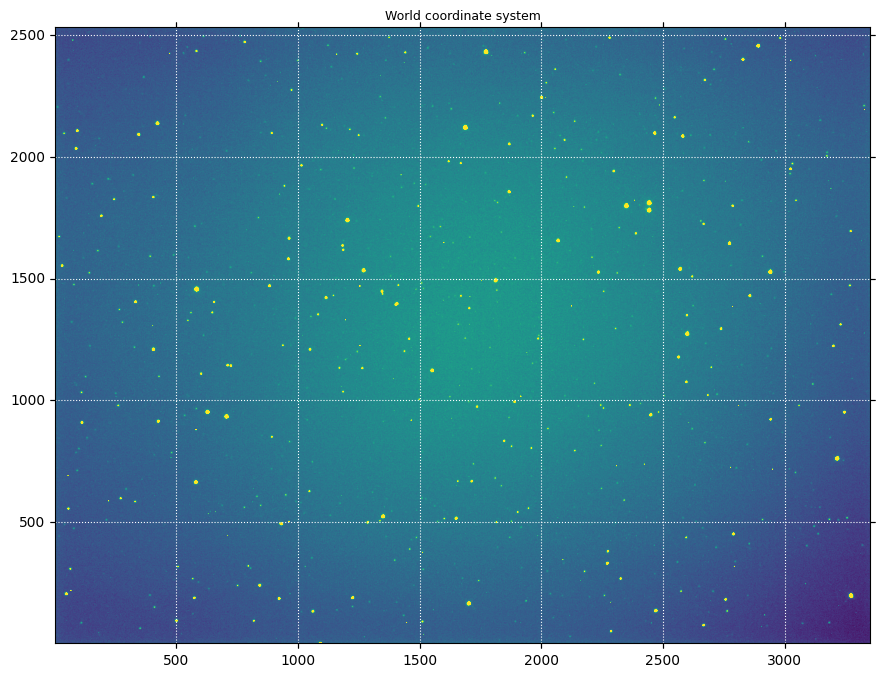

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(12, 8),
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = zimshow(axs, hdul[0].data, )
axs.set_title('World coordinate system', fontsize=9)
axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('bl')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('bl')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')
axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

annul.plot(axs, color="r")
for i in range(len(pos)):
    axs.text(pos[i][0], pos[i][1], f"Star #{str(i)}", fontsize=6, color='w')

annul.plot(axs, color="r")

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )
cbar.ax.tick_params(labelsize=8)

plt.suptitle(f"fname: {fpath.name}\n Result of DAOFinder", fontsize=10,)

axs.annotate(f'FWHM: {FWHM}', fontsize=8,
    xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Sky threshold: {thresh:.02f}', fontsize=8,
    xy=(0, 0), xytext=(-10, -40), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Number of star(s): {len(DAOfound)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{save_dir_name}/{fpath.stem}_starfinder.png")

plt.show()
#plt.close()

## Aperture photometry

### aperture area

#### mask

이제 별의 구경(aperture) 영역을 확인해 보겠습니다.

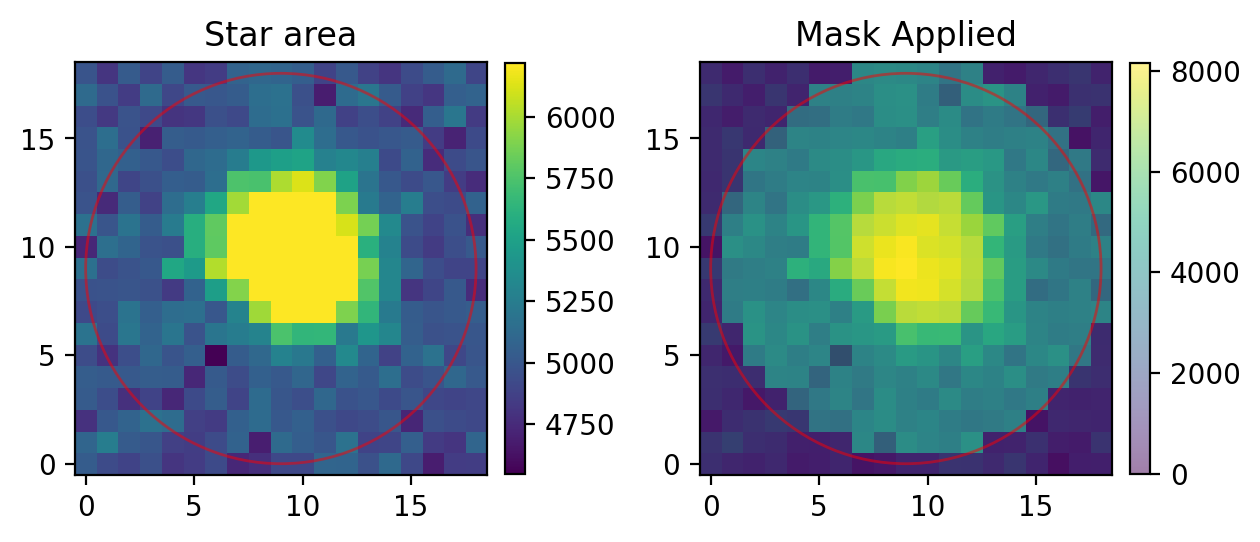

In [ ]:
idx = 7
mask_apert = (apert.to_mask(method='center'))[idx]
star_apply  = mask_apert.multiply(hdul[0].data)
starimg = mask_apert.cutout(hdul[0].data)

fig, axs = plt.subplots(1, 2,
                        sharex=False, sharey=False, gridspec_kw=None)

im0 = zimshow(axs[0], starimg,)

im1 = zimshow(axs[1], starimg)
im1 = zimshow(axs[1], star_apply, alpha=0.5)

ap = CAp(positions = (int(starimg.shape[0]/2),int(starimg.shape[1]/2)),
                r=R_AP)
ap.plot(ax=axs[0], color='r', lw=1, alpha=0.5)
ap.plot(ax=axs[1], color='r', lw=1, alpha=0.5)

axs[0].set_title('Star area',)
axs[1].set_title('Mask Applied',)

plt.colorbar(im0, ax=axs[0], fraction=0.0455, pad=0.04, )
plt.colorbar(im1, ax=axs[1], fraction=0.0455, pad=0.04, )

plt.tight_layout()
plt.show()

star_apply로 masking 된 영역은 별이 aperture 영역만 지름이 FWHM 크기인 원형으로 마스킹 해줍니다. 물론 픽셀의 모양은 정사각형이고 마스킹한 부분을 제외한 곳의 픽셀값은 0이 됩니다.

In [ ]:
print("starimg :", starimg)
print("star_apply :", star_apply)

starimg : [[5034.756  4927.9155 4887.454  4957.8984 4803.184  4844.1577 4923.9443
  4735.338  4774.702  4911.703  4912.8228 5094.6216 5089.3027 4962.056
  5120.29   4910.639  4682.823  4843.387  4854.283 ]
 [5095.9404 5257.708  5024.765  4997.3315 4867.9277 4852.8467 4931.0654
  5071.968  4691.1025 5125.2344 5046.909  4996.2534 5175.5264 4887.178
  4897.2847 5051.4976 4838.9297 4804.876  5095.59  ]
 [4789.2437 5009.953  5082.3574 5168.9023 5136.1196 4867.4165 4840.5405
  5058.167  5132.405  5005.9375 5058.964  4958.665  4908.283  4938.6646
  4996.8135 4726.5747 4958.326  4931.367  4908.3423]
 [5029.1577 4945.6074 4777.995  4883.1787 4736.4185 4922.8945 5039.199
  4890.9204 5130.4424 4996.8794 4946.204  5105.956  4967.078  5000.2363
  4921.765  4990.1733 4900.774  4890.944  4907.03  ]
 [5040.501  5020.4473 5016.635  5040.4985 5031.2344 4733.037  5018.6694
  4939.5186 5060.9175 5017.004  5100.666  4906.5312 5079.22   5022.4966
  5153.8247 4934.746  4980.9897 5106.3003 5011.9434]
 [4939.5

#### 여러별 확인

여러개의 별을 display 하는 함수를 만들어서 aperture 영역을 확인해 보자.

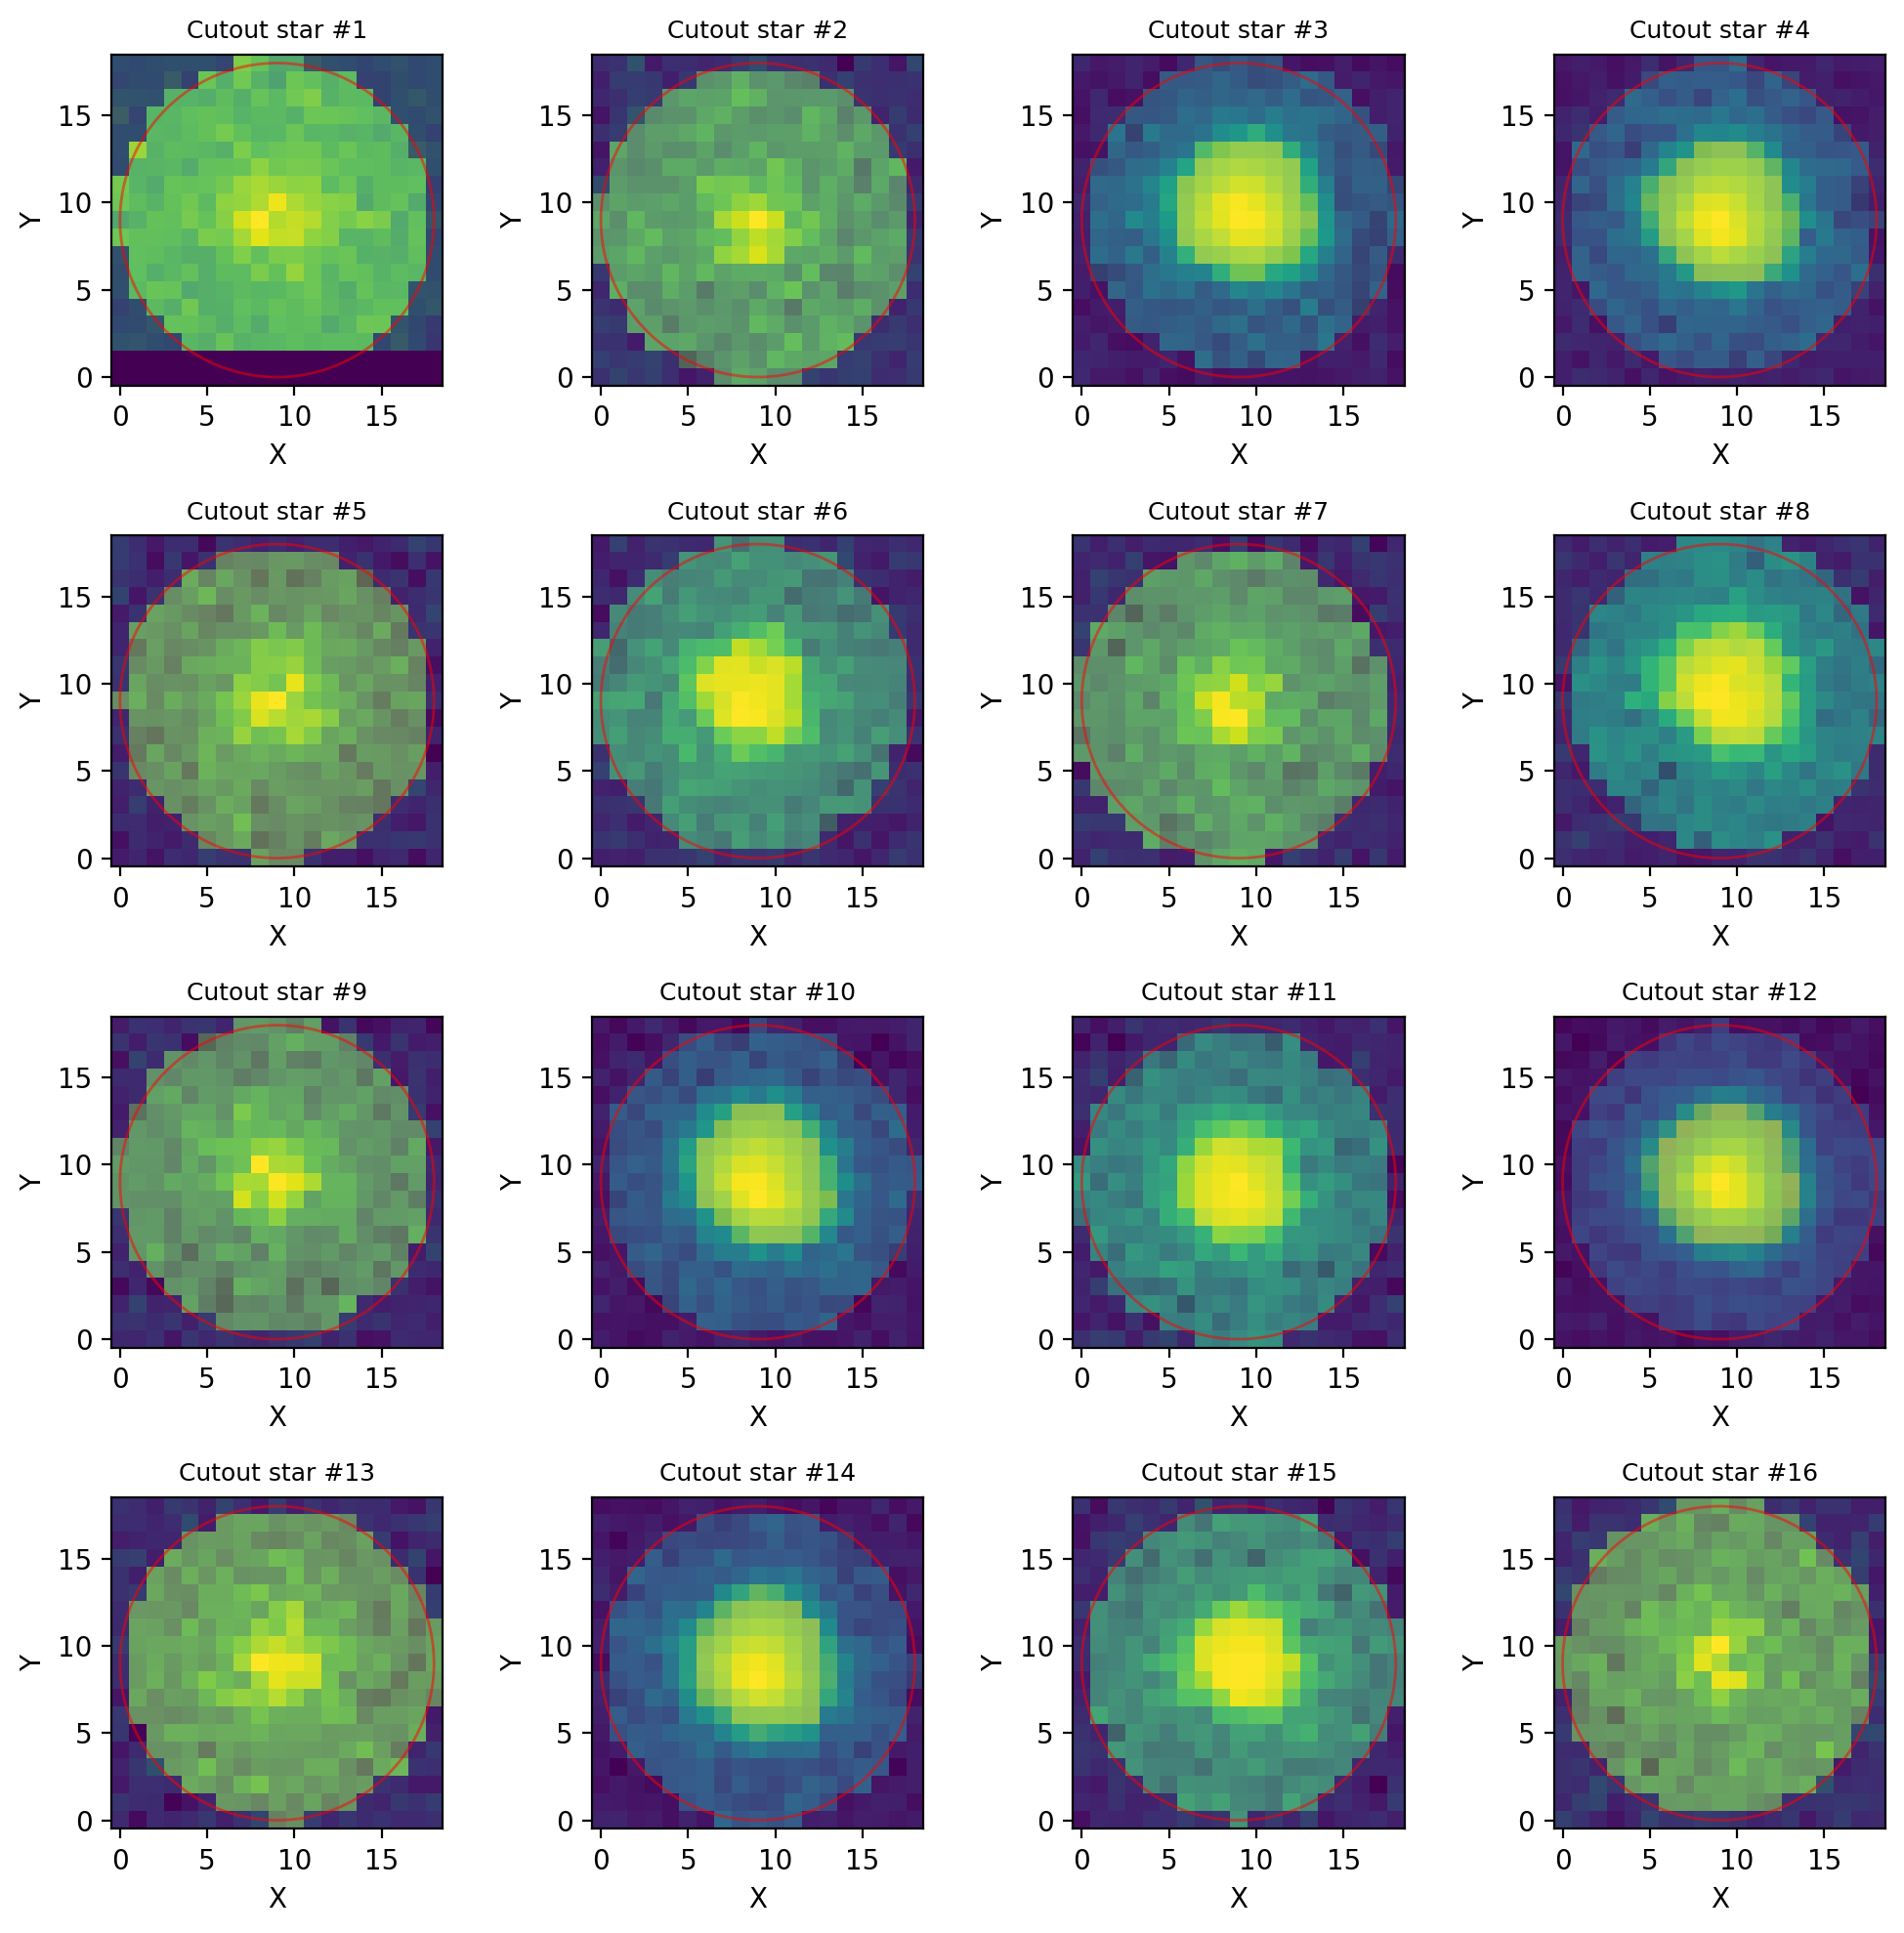

In [ ]:
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

def plot_cutouts(apert, data, indices, cols, figsize=(10, 10)):
    """
    지정된 인덱스에 해당하는 마스크를 적용한 cutout 이미지를 여러 개 그리는 함수

    Args:
        mask: 마스크 이미지 (Astropy Cutout2D 또는 ndarray)
        data: 원본 이미지 데이터 (Astropy ImageHDU 또는 ndarray)
        indices: 그릴 cutout의 인덱스 리스트
        figsize: 그래프 크기 (default: (10, 5))
    """

    ncols = min(len(indices), cols)  # 최대 5열
    nrows = (len(indices) + 1) // ncols  # 필요한 행 수

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()  # 1차원 배열로 변환

    for i, idx in enumerate(indices):
        mask_apert = (apert.to_mask(method='center'))[idx]
        star_apply  = mask_apert.multiply(hdul[0].data)
        starimg = mask_apert.cutout(hdul[0].data)

        ap = CAp(positions = (int(starimg.shape[0]/2),int(starimg.shape[1]/2)),
                r=R_AP)

        im0 = zimshow(axs[i], starimg, )
        im1 = zimshow(axs[i], star_apply, alpha=0.5)

        ap.plot(ax = axs[i], color='r', lw=1, alpha=0.5)

        axs[i].set_title(f"Cutout star #{idx+1}", fontsize=9)
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')

    # 여백 조절
    plt.tight_layout()
    plt.show()

# 사용 예시
plot_cutouts(apert, hdul[0].data, range(0, 16), 4,  figsize=(10, 10))

#### aperture sum

구경 안의 픽셀 값들의 합은 aperture_photometry 함수로 쉽게 구할 수 있습니다.

In [ ]:
from photutils.aperture import aperture_photometry as apphot
apphot_result = apphot(hdul[0].data, apert, method='center')
print(type(apphot_result))
apphot_result
df_apphot = apphot_result.to_pandas()
df_apphot

<class 'astropy.table.table.QTable'>


,id,xcenter,ycenter,aperture_sum
0,1,943.742194,7.219668,1.263688e+06
1,2,1557.819612,8.716972,1.305866e+06
2,3,1016.296773,12.401798,1.460322e+06
3,4,1975.037138,14.092487,1.462485e+06
4,5,1212.974534,16.865165,1.272295e+06
...,...,...,...,...
556,557,1250.094336,2494.926943,1.257820e+06
557,558,3302.251529,2498.295998,1.357542e+06
558,559,2394.872479,2498.856527,1.257658e+06
559,560,713.194754,2512.254472,2.267929e+06


#### aperture area

구경의 넓이(픽셀 수)는 apert.area로 간단하게 구할 수 있습니다.

In [ ]:
ap_area   = apert.area
ap_area

254.46900494077323

### annulus area

#### mask

이제 별 주변의 반지(annulus) 영역을 확인해 보겠습니다.

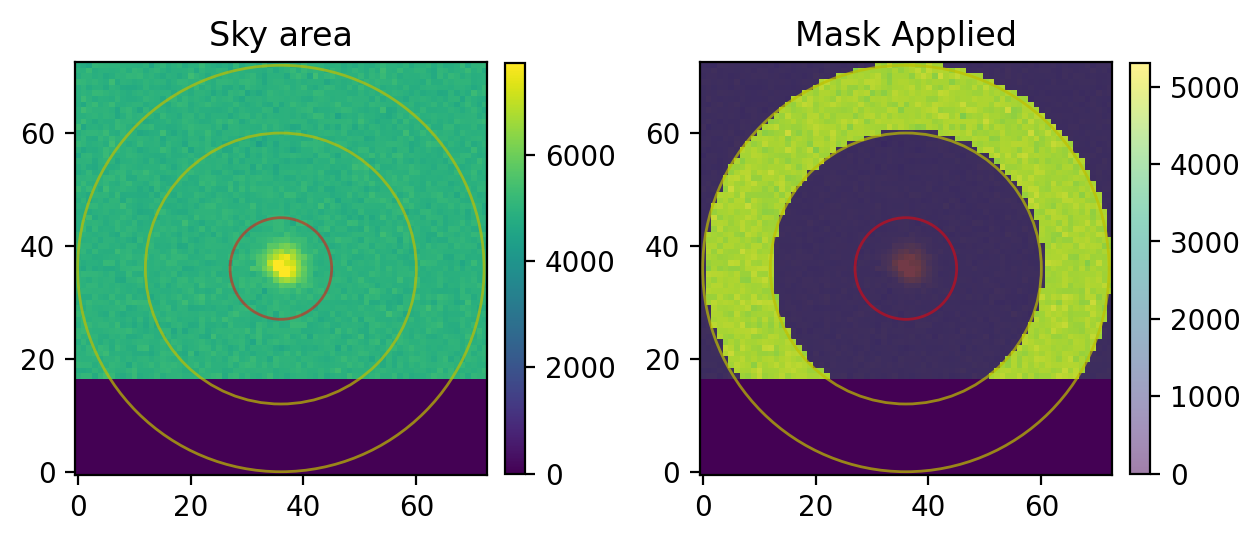

In [ ]:
idx = 7
mask_annul = (annul.to_mask(method='center'))[idx]
sky_apply  = mask_annul.multiply(hdul[0].data)
skyimg = mask_annul.cutout(hdul[0].data)

fig, axs = plt.subplots(1, 2,
                        sharex=False, sharey=False, gridspec_kw=None)

im0 = zimshow(axs[0], skyimg,)

im1 = zimshow(axs[1], skyimg, )
im1 = zimshow(axs[1], sky_apply, alpha=0.5)
ap = CAp(positions = (int(skyimg.shape[0]/2),int(skyimg.shape[1]/2)),
        r=R_AP)
an = CAn(positions = (int(skyimg.shape[0]/2),int(skyimg.shape[1]/2)),
        r_in=R_IN,
        r_out=R_OUT)

im0 = zimshow(axs[0], skyimg, )
im1 = zimshow(axs[1], sky_apply, alpha=0.5)

ap.plot(ax = axs[0], color='r', lw=1, alpha=0.5)
an.plot(ax = axs[0], color='y', lw=1, alpha=0.7)
ap.plot(ax = axs[1], color='r', lw=1, alpha=0.5)
an.plot(ax = axs[1], color='y', lw=1, alpha=0.7)

axs[0].set_title('Sky area',)
axs[1].set_title('Mask Applied',)

plt.colorbar(im0, ax=axs[0], fraction=0.0455, pad=0.04, )
plt.colorbar(im1, ax=axs[1], fraction=0.0455, pad=0.04, )

plt.tight_layout()
plt.show()

sky_apply로 masking 된 영역은 별이 주위의 anulus 영역만 바깥쪽 지름 R_OUT, 안쪽 지름 R_IN인 반지 모양으로 마스킹 해줍니다. 물론 픽셀의 모양은 정사각형이고 마스킹한 부분을 제외한 곳의 픽셀값은 0이 됩니다.

In [ ]:
print("skyimg :", skyimg)
print("sky_apply :", sky_apply)

skyimg : [[   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 ...
 [4843.8955 5024.0444 5019.7305 ... 4844.635  4865.918  4921.1777]
 [4970.4844 4928.399  5197.3794 ... 4902.4375 5054.884  4751.798 ]
 [4805.3535 4750.889  4593.8896 ... 5026.96   5024.4043 5064.92  ]]
sky_apply : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


여러 개의 별을 display 하는 함수를 만들어서 anulus 영역을 확인해 보겠습니다.

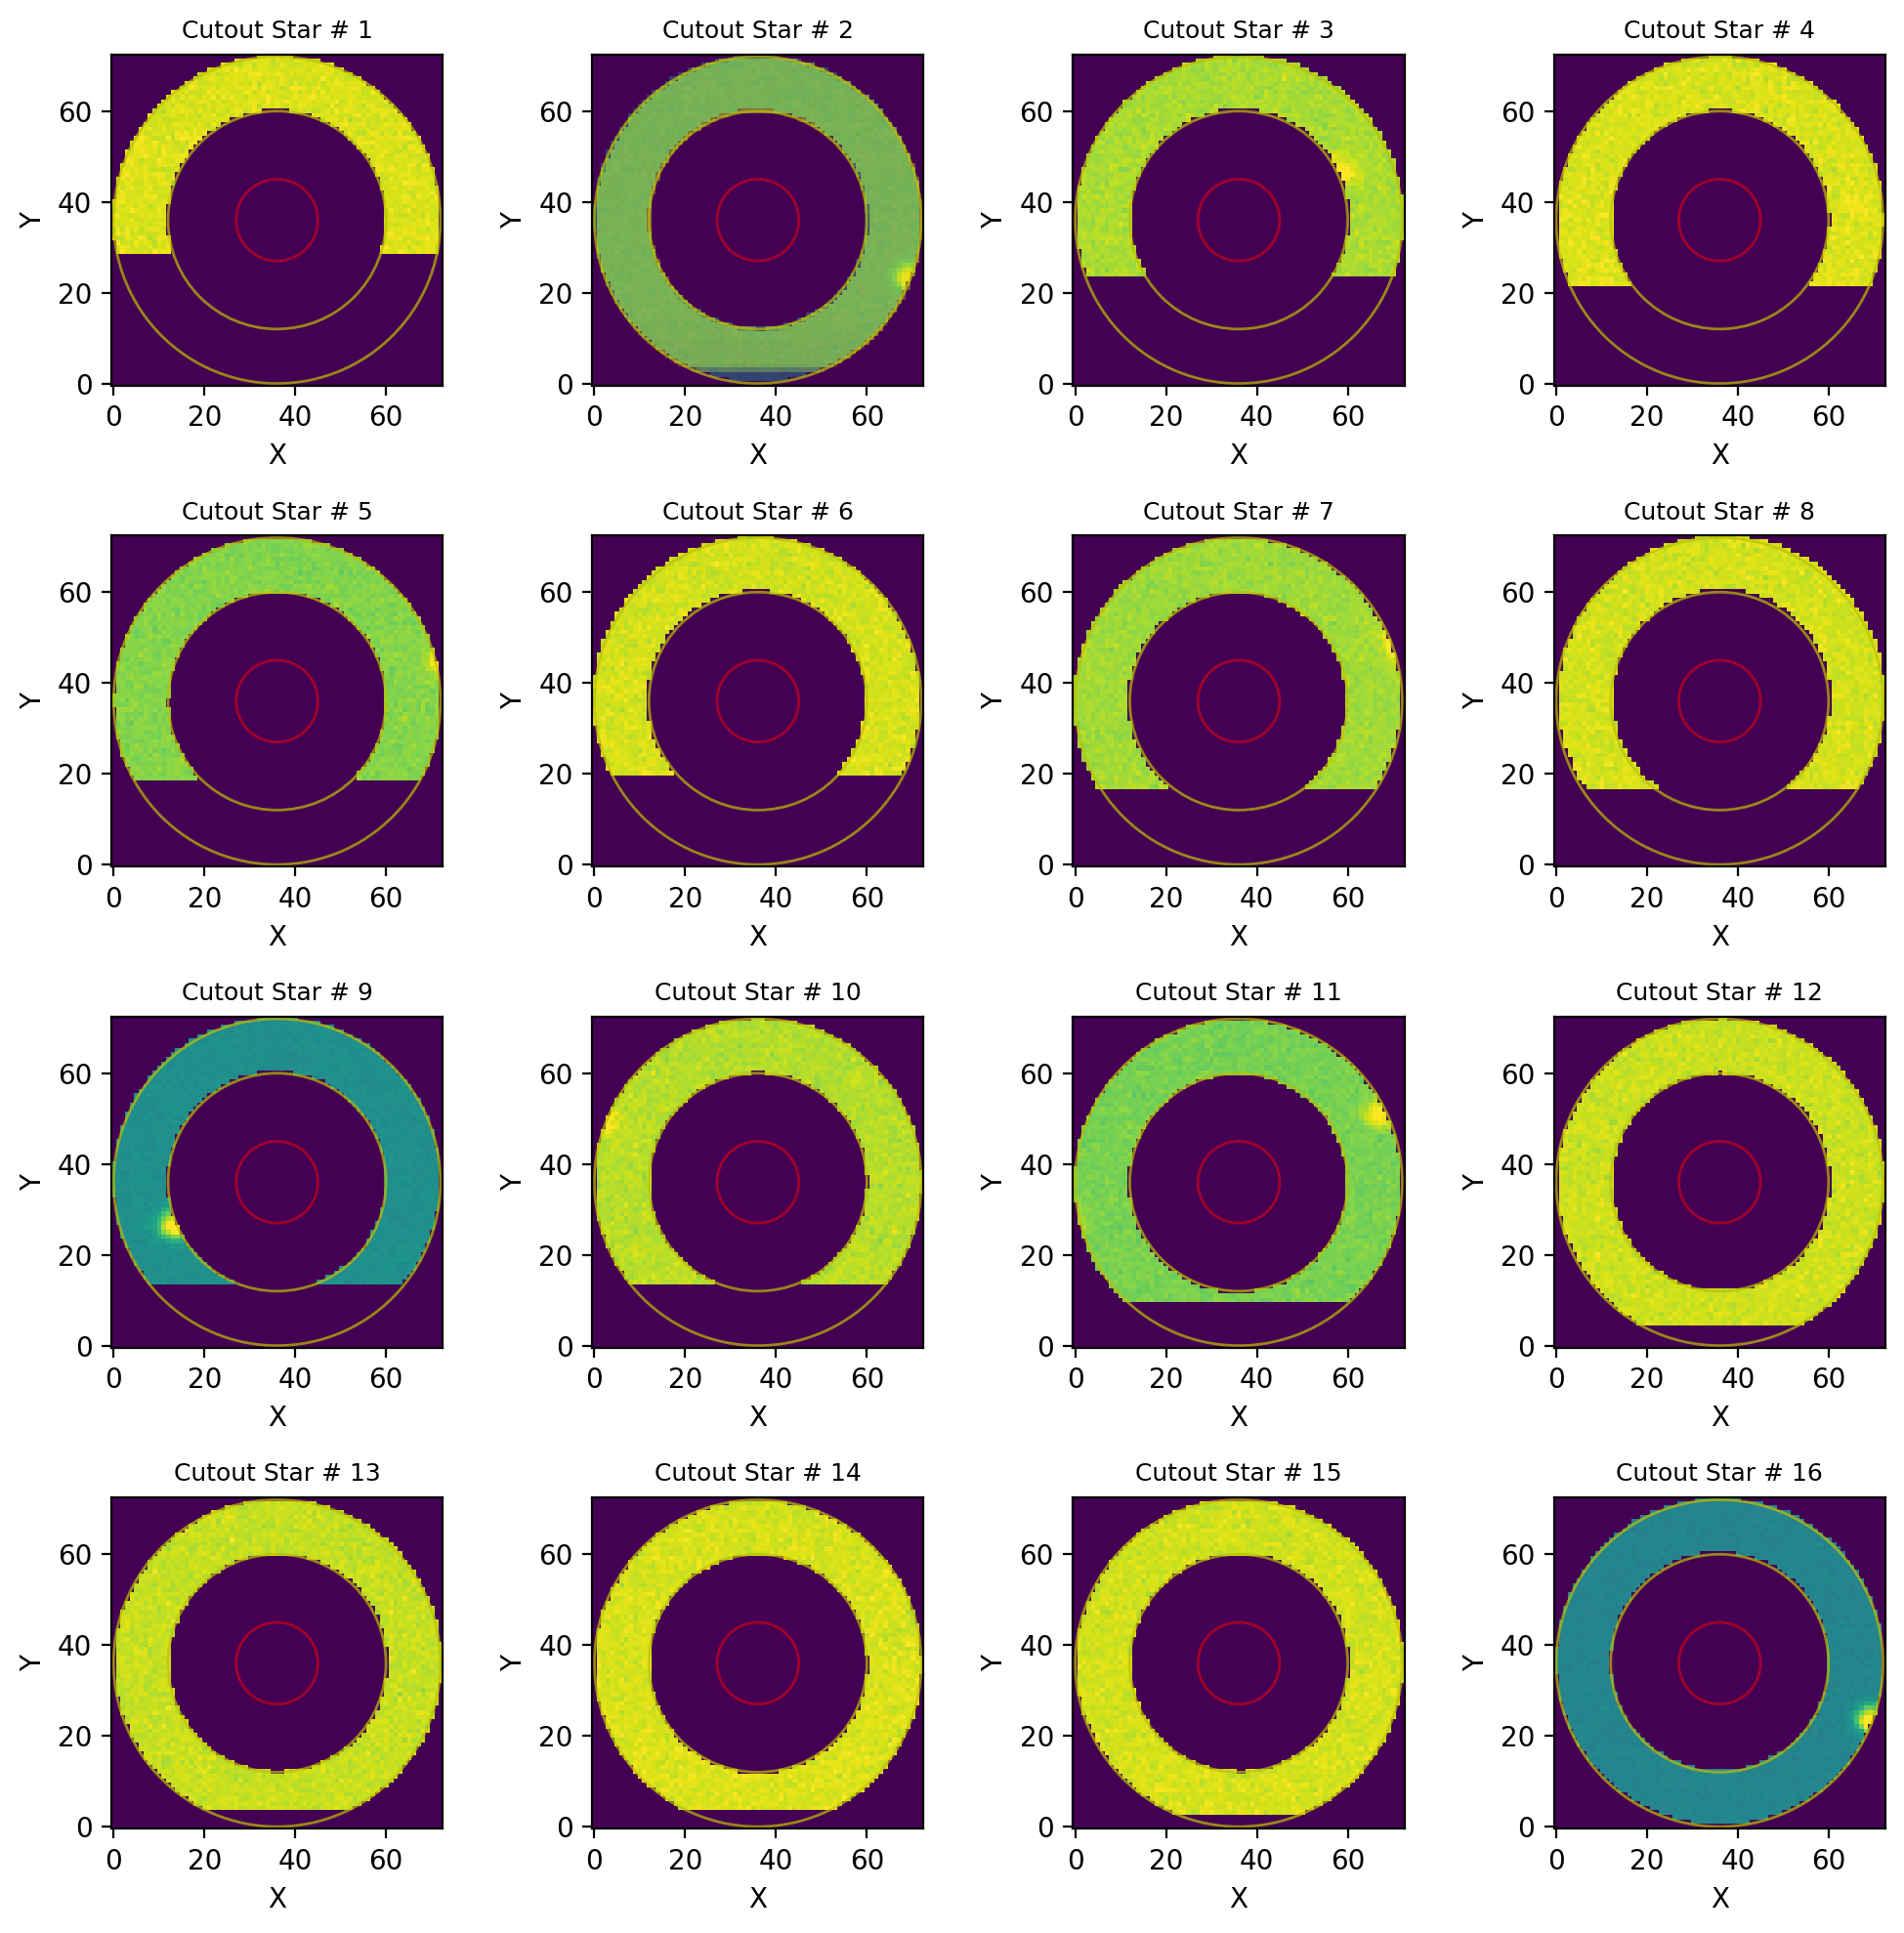

In [ ]:
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

def plot_cutouts(apert, data, indices, cols, figsize=(10, 10)):
    """
    지정된 인덱스에 해당하는 마스크를 적용한 cutout 이미지를 여러 개 그리는 함수

    Args:
        mask: 마스크 이미지 (Astropy Cutout2D 또는 ndarray)
        data: 원본 이미지 데이터 (Astropy ImageHDU 또는 ndarray)
        indices: 그릴 cutout의 인덱스 리스트
        figsize: 그래프 크기 (default: (10, 5))
    """

    ncols = min(len(indices), cols)  # 최대 5열
    nrows = (len(indices) + 1) // ncols  # 필요한 행 수

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()  # 1차원 배열로 변환

    for i, idx in enumerate(indices):
        mask_annul = (annul.to_mask(method='center'))[idx]
        sky_apply  = mask_annul.multiply(data)
        starimg = mask_annul.cutout(hdul[0].data)

        im0 = zimshow(axs[i], sky_apply, )
        im1 = zimshow(axs[1], sky_apply, alpha=0.5)

        ap = CAp(positions = (int(skyimg.shape[0]/2),int(skyimg.shape[1]/2)),
                r=R_AP)
        an = CAn(positions = (int(skyimg.shape[0]/2),int(skyimg.shape[1]/2)),
                r_in=R_IN,
                r_out=R_OUT)

        ap.plot(ax = axs[i], color='r', lw=1, alpha=0.5)
        an.plot(ax = axs[i], color='y', lw=1, alpha=0.7)

        axs[i].set_title(f"Cutout Star # {idx+1}", fontsize=9)
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')

    # 여백 조절
    plt.tight_layout()
    plt.show()

# 사용 예시 (mask_annul, hdul[0].data, 그리고 그릴 인덱스를 지정)
plot_cutouts(annul, hdul[0].data, range(0, 16), 4,  figsize=(10, 10))

#### sky estimation

반지 영역을 이용하여 sky value를 구해야 하는데 이때 주의해야 할 점이 있습니다. 위의 예시에서 #10번 별의 경우에는 반지 영역에 별을 포함하고 있습니다. 이때 별 영역을 효과적으로 제거하고 sky value를 구해야 할 것입니다.

다음의 함수를 이용하여 적절하게 하늘의 값을 구할 수 있습니다.

In [ ]:
import numpy as np
from astropy.stats import sigma_clip

def sky_fit(all_sky, method='mode', sky_nsigma=3, sky_iter=5, \
            mode_option='sex', med_factor=2.5, mean_factor=1.5):
    '''
    Estimate sky from given sky values.
    Parameters
    ----------
    all_sky : ~numpy.ndarray
        The sky values as numpy ndarray format. It MUST be 1-d for proper use.
    method : {"mean", "median", "mode"}, optional
        The method to estimate sky value. You can give options to "mode"
        case; see mode_option.
        "mode" is analogous to Mode Estimator Background of photutils.
    sky_nsigma : float, optinal
        The input parameter for sky sigma clipping.
    sky_iter : float, optinal
        The input parameter for sky sigma clipping.
    mode_option : {"sex", "IRAF", "MMM"}, optional.
        sex  == (med_factor, mean_factor) = (2.5, 1.5)
        IRAF == (med_factor, mean_factor) = (3, 2)
        MMM  == (med_factor, mean_factor) = (3, 2)
    Returns
    -------
    sky : float
        The estimated sky value within the all_sky data, after sigma clipping.
    std : float
        The sample standard deviation of sky value within the all_sky data,
        after sigma clipping.
    nsky : int
        The number of pixels which were used for sky estimation after the
        sigma clipping.
    nrej : int
        The number of pixels which are rejected after sigma clipping.
    -------
    '''
    sky = all_sky.copy()
    if method == 'mean':
        return np.mean(sky), np.std(sky, ddof=1)

    elif method == 'median':
        return np.median(sky), np.std(sky, ddof=1)

    elif method == 'mode':
        sky_clip   = sigma_clip(sky, sigma=sky_nsigma,
                                maxiters=sky_iter, #iters=sky_iter,
                                )
        sky_clipped= sky[np.invert(sky_clip.mask)]
        nsky       = np.count_nonzero(sky_clipped)
        mean       = np.mean(sky_clipped)
        med        = np.median(sky_clipped)
        std        = np.std(sky_clipped, ddof=1)
        nrej       = len(all_sky) - len(sky_clipped)

        if nrej < 0:
            raise ValueError('nrej < 0: check the code')

        if nrej > nsky: # rejected > survived
            raise Warning('More than half of the pixels rejected.')

        if mode_option == 'IRAF':
            if (mean < med):
                sky = mean
            else:
                sky = 3 * med - 2 * mean

        elif mode_option == 'MMM':
            sky = 3 * med - 2 * mean

        elif mode_option == 'sex':
            if (mean - med) / std > 0.3:
                sky = med
            else:
                sky = (2.5 * med) - (1.5 * mean)
        else:
            raise ValueError('mode_option not understood')

        return sky, std, nsky, nrej

In [ ]:
idx = 1
mask_annul = (annul.to_mask(method='center'))[idx]
annul_weighted = mask_annul.multiply(hdul[0].data)
sky_non0   = np.nonzero(annul_weighted)
sky_pixel  = annul_weighted[sky_non0]

msky, sky_std, nsky, nrej = sky_fit(sky_pixel, method='mode',
                                        mode_option='sex')

print("msky, sky_std, nsky, nrej :", msky, sky_std, nsky, nrej)

msky, sky_std, nsky, nrej : 4973.606653800269 117.93053002054593 1349 5


## instrumental magnitude

### def mag_inst

ADU 값을 이용하여 기기 등급을 구하는 함수를 정의해 봅니다.

In [ ]:
#Returns magnitude from flux.
def mag_inst(flux, ferr):
    m_inst = -2.5 * np.log10(flux)
    merr   = 2.5 / np.log(10) * ferr / flux
    return m_inst, merr

In [ ]:
2.5 / np.log(10) * 10 / 100
2.5 *10 / np.log(10) /  100
np.log(10)

2.302585092994046

### 모든 별 측광하기

DAOfinder로 찾은 모든 별에 대하여 기기등급을 구할 수 있다.

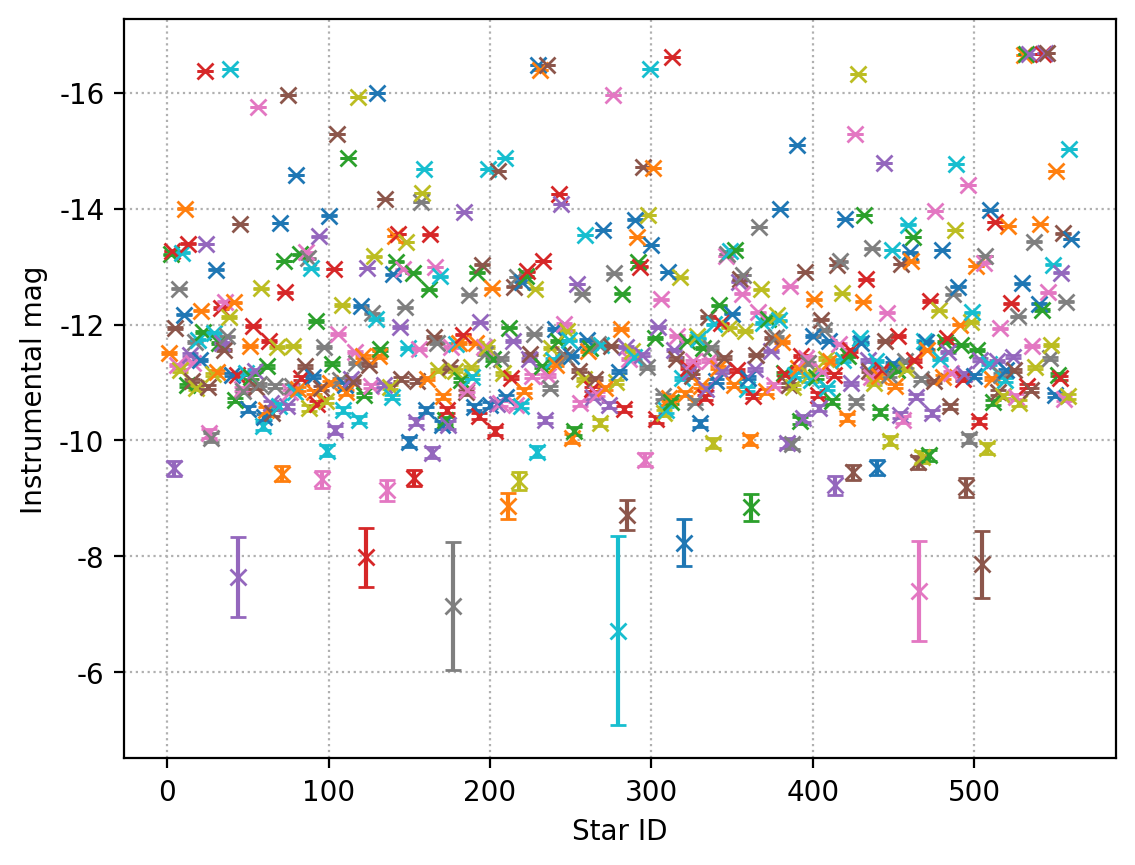

In [ ]:
# since our `annul` has many elements,
mask_apert = (apert.to_mask(method='center'))
mask_annul = (annul.to_mask(method='center'))

mag_ann  = np.zeros(len(apphot_result))
merr_ann = np.zeros(len(apphot_result))

fig, ax = plt.subplots()

for i in range(len(apphot_result)):
    annul_weighted = mask_annul[i].multiply(hdul[0].data)
    sky_non0   = np.nonzero(annul_weighted)
    sky_pixel  = annul_weighted[sky_non0]
    msky, sky_std, nsky, nrej = sky_fit(sky_pixel, method='mode', mode_option='sex')

    flux_star = apphot_result['aperture_sum'][i] - msky * ap_area  # total - sky

    flux_err  = np.sqrt(apphot_result['aperture_sum'][i] * gain    # Poissonian (star + sky)
                        + ap_area * rdnoise**2 # Gaussian
                        + (ap_area * (gain * sky_std))**2 / nsky )

    mag_ann[i], merr_ann[i] = mag_inst(flux_star, flux_err)
    # print(i, msky, sky_std, nsky, nrej)
    # print(i, mag_ann[idx], merr_ann[idx])
    try:
        ax.errorbar(i, mag_ann[i], yerr=merr_ann[i],
                    marker='x',
                    #ms=10,
                    capsize=3)
    except:
        continue

ax.invert_yaxis()
#ax.set_ylim(ymin=-13, ymax=-10)
plt.xlabel('Star ID')
plt.ylabel('Instrumental mag')
plt.grid(ls=':')
plt.show()

### 결과 저장

dataframe으로 변환하여 csv 파일로 저장하자.

In [ ]:
for i, row in df_apphot.iterrows():
    annul_weighted = mask_annul[i].multiply(hdul[0].data)
    sky_non0   = np.nonzero(annul_weighted)
    sky_pixel  = annul_weighted[sky_non0]
    msky, sky_std, nsky, nrej = sky_fit(sky_pixel, method='mode', mode_option='sex')

    flux_star = apphot_result['aperture_sum'][i] - msky * ap_area  # total - sky

    flux_err  = np.sqrt(apphot_result['aperture_sum'][i] * gain    # Poissonian (star + sky)
                        + ap_area * rdnoise**2 # Gaussian
                        + (ap_area * (gain * sky_std))**2 / nsky )

    mag_ann, merr_ann = mag_inst(flux_star, flux_err)
    df_apphot.loc[i, 'msky'] = msky
    df_apphot.loc[i, 'sky_std'] = sky_std
    df_apphot.loc[i, 'nsky'] = nsky  #추가함
    df_apphot.loc[i, 'nrej'] = nrej
    df_apphot.loc[i, 'flux_star'] = flux_star
    df_apphot.loc[i, 'flux_err'] = flux_err
    df_apphot.loc[i, 'mag_inst'] = mag_ann
    df_apphot.loc[i, 'merr_inst'] = merr_ann

df_apphot.to_csv(f"{str(BASEPATH / save_dir_name)}/{fpath.stem}_m_inst.csv")
print(f"{str(BASEPATH / save_dir_name)}/{fpath.stem}_m_inst.csv")

df_apphot

aper_photometry/TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin_m_inst.csv


,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,mag_inst,merr_inst
0,1,943.742194,7.219668,1.263688e+06,4979.925854,120.173185,1318.0,3.0,-3.548762e+03,765.968647,NaN,-0.234346
1,2,1557.819612,8.716972,1.305866e+06,4973.606654,117.930530,1349.0,5.0,4.023705e+04,772.381087,-11.511565,0.020842
2,3,1016.296773,12.401798,1.460322e+06,4982.008517,124.066841,1431.0,20.0,1.925548e+05,810.976784,-13.211386,0.004573
3,4,1975.037138,14.092487,1.462485e+06,4952.651535,121.338881,1488.0,8.0,2.021887e+05,806.748252,-13.264392,0.004332
4,5,1212.974534,16.865165,1.272295e+06,4974.474930,121.927338,1562.0,16.0,6.444999e+03,759.690258,-9.523057,0.127979
...,...,...,...,...,...,...,...,...,...,...,...,...
556,557,1250.094336,2494.926943,1.257820e+06,4866.541782,116.596769,2253.0,8.0,1.943583e+04,735.454903,-10.721508,0.041084
557,558,3302.251529,2498.295998,1.357542e+06,4979.544819,126.653146,2200.0,10.0,9.040209e+04,767.422130,-12.390446,0.009217
558,559,2394.872479,2498.856527,1.257658e+06,4863.117030,120.451364,2186.0,8.0,2.014515e+04,739.039126,-10.760426,0.039831
559,560,713.194754,2512.254472,2.267929e+06,4893.481083,122.583509,1633.0,3.0,1.022690e+06,970.936052,-15.024360,0.001031
